Importing Libraries and Dataset

In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings
warnings.filterwarnings("ignore")

# 2. Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# 3. Load Data
df = pd.read_csv(r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\data\diabetes.csv")
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [3]:
print("✅ Shape:", df.shape)
df.info()

✅ Shape: (100000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 no

In [4]:
# Statistical summary
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# Missing values and duplicates
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values:
 year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

Duplicate rows: 14


In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print("✅ Shape after dropping duplicates:", df.shape)

✅ Shape after dropping duplicates: (99986, 16)


In [7]:
# Checking if age < 1 exists (Outliers)
print("🔍 Number of records with age < 1:", (df['age'] < 1).sum())

🔍 Number of records with age < 1: 911


In [8]:
# Removing records with age < 1
df = df[df['age'] >= 1]
print("✅ Shape after filtering age < 1:", df.shape)

✅ Shape after filtering age < 1: (99075, 16)


In [9]:
# List of numeric columns to check
numeric_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

# Check for any negative values
for col in numeric_cols:
    negatives = (df[col] < 0).sum()
    if negatives > 0:
        print(f"⚠️ {col} has {negatives} negative values")
    else:
        print(f"✅ {col} has no negative values")

✅ age has no negative values
✅ bmi has no negative values
✅ hbA1c_level has no negative values
✅ blood_glucose_level has no negative values


In [10]:
# IQR-based capping for BMI
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Cap BMI values above upper_bound
df['bmi'] = np.where(df['bmi'] > upper_bound, upper_bound, df['bmi'])
print("✅ BMI values capped at upper bound:", upper_bound)

✅ BMI values capped at upper bound: 38.445


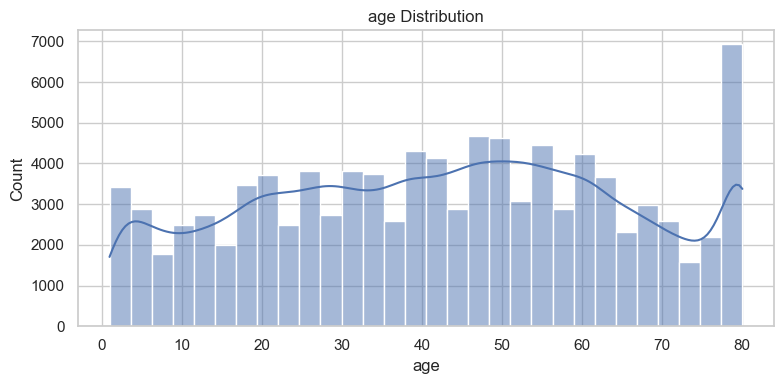

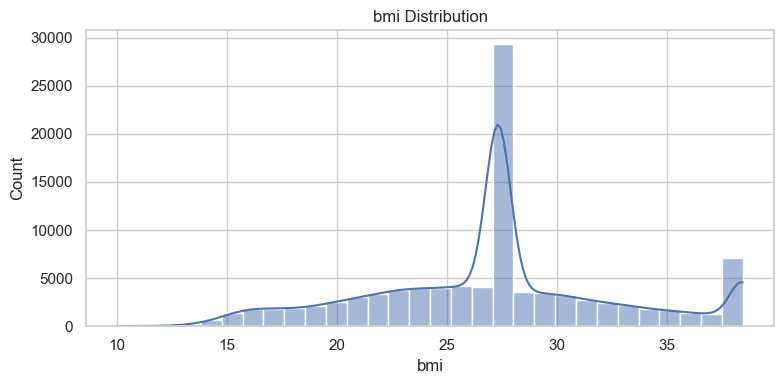

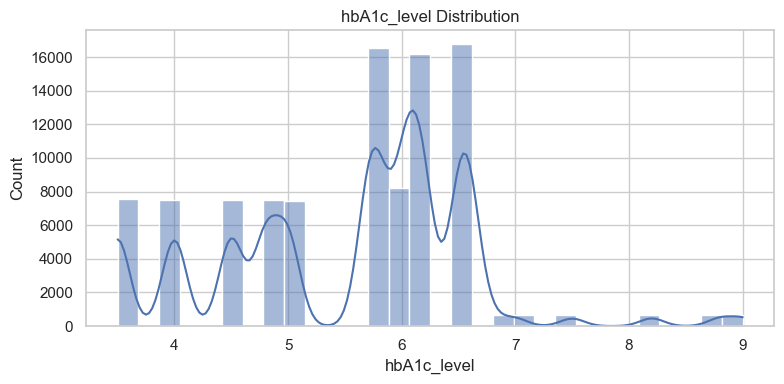

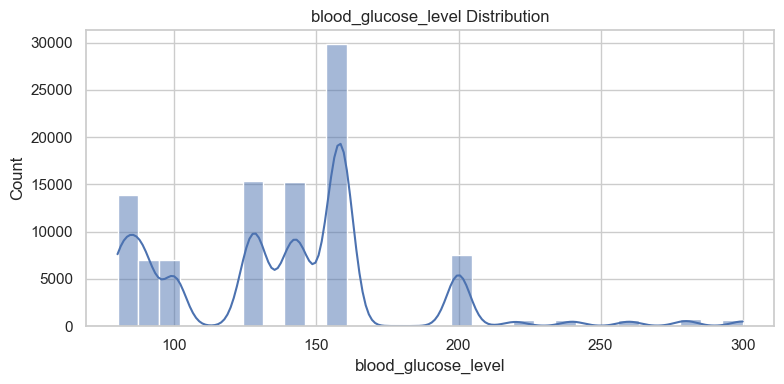

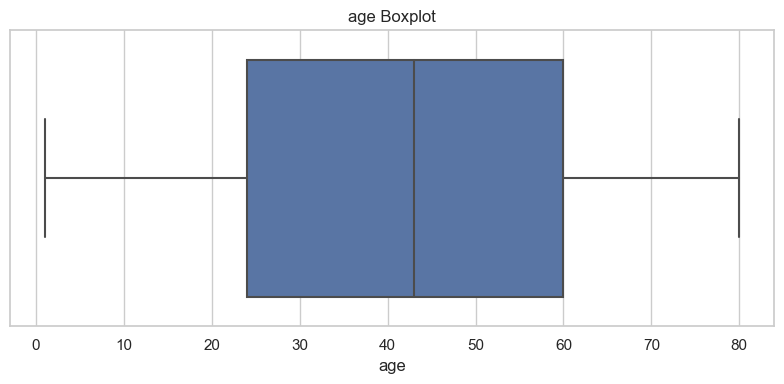

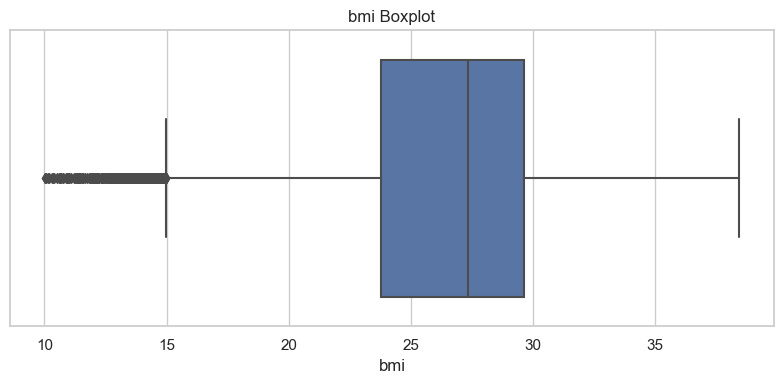

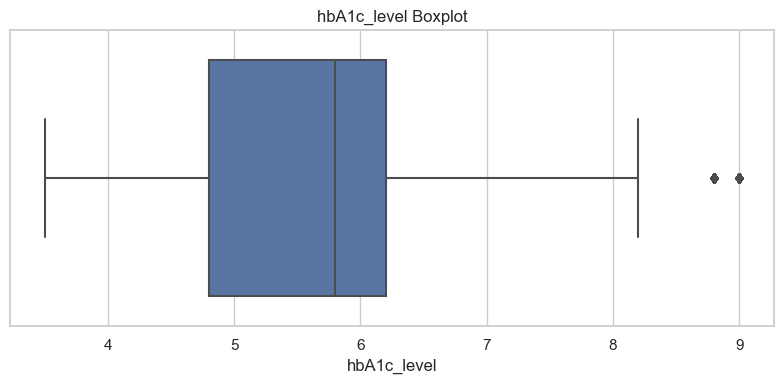

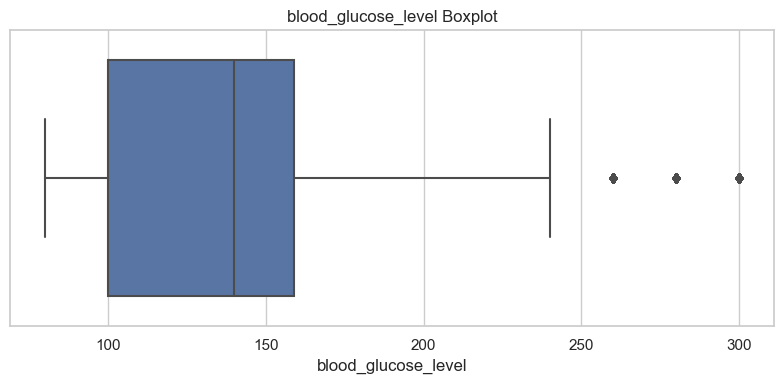

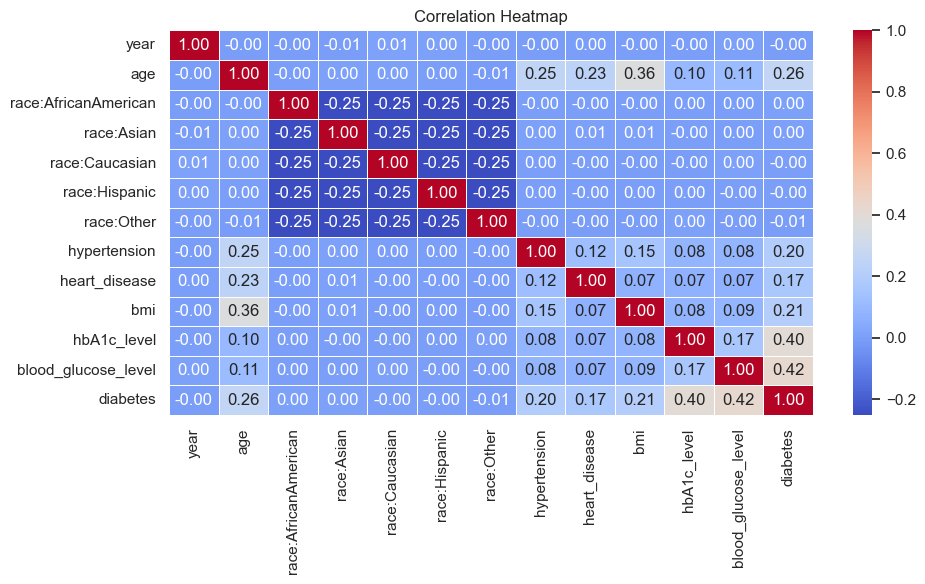

In [11]:
# List of numeric columns to plot
num_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Plot boxplots
for col in num_cols:    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Correlation heatmap
# Only using numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show();

📊 Plotting Diabetes Distribution by Categorical Variables

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='gender', ylabel='count'>

Text(0.5, 1.0, 'gender vs Diabetes')

Text(0.5, 0, 'gender')

Text(0, 0.5, 'Count')

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Other')])

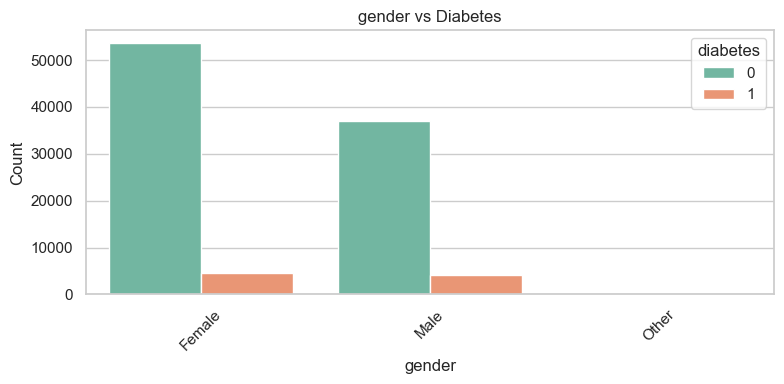

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='smoking_history', ylabel='count'>

Text(0.5, 1.0, 'smoking_history vs Diabetes')

Text(0.5, 0, 'smoking_history')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'never'),
  Text(1, 0, 'not current'),
  Text(2, 0, 'current'),
  Text(3, 0, 'No Info'),
  Text(4, 0, 'ever'),
  Text(5, 0, 'former')])

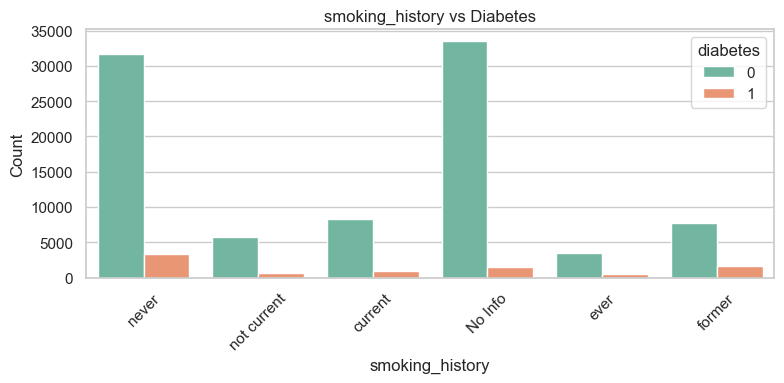

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='location', ylabel='count'>

Text(0.5, 1.0, 'location vs Diabetes')

Text(0.5, 0, 'location')

Text(0, 0.5, 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'District of Columbia'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Guam'),
  Text(12, 0, 'Hawaii'),
  Text(13, 0, 'Idaho'),
  Text(14, 0, 'Illinois'),
  Text(15, 0, 'Indiana'),
  Text(16, 0, 'Iowa'),
  Text(17, 0, 'Kansas'),
  Text(18, 0, 'Kentucky'),
  Text(19, 0, 'Louisiana'),
  Text(20, 0, 'Maine'),
  Text(21, 0, 'Maryland'),
  Text(22, 0, 'Massachusetts'),
  Text(23, 0, 'Michigan'),
  Text(24, 0, 'Minnesota'),
  Text(25, 0, 'Mississippi'),
  Text(26, 0, 'Missouri'),
  Text(27, 0, 'Montana'),

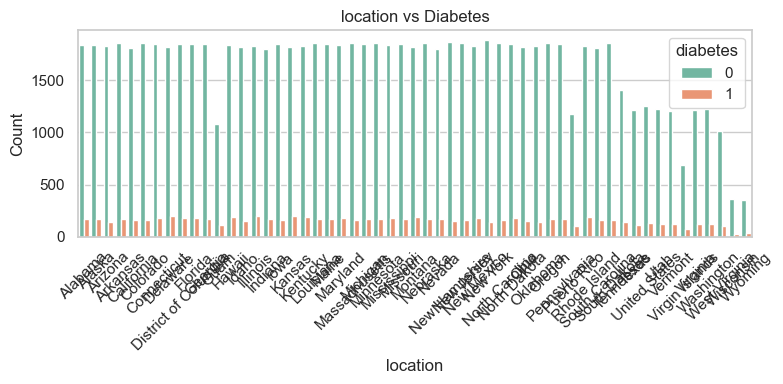

In [12]:
cat_cols = ['gender', 'smoking_history', 'location']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='diabetes', palette='Set2')
    plt.title(f"{col} vs Diabetes")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show();

Multivariate Plot – BMI vs HbA1c Level

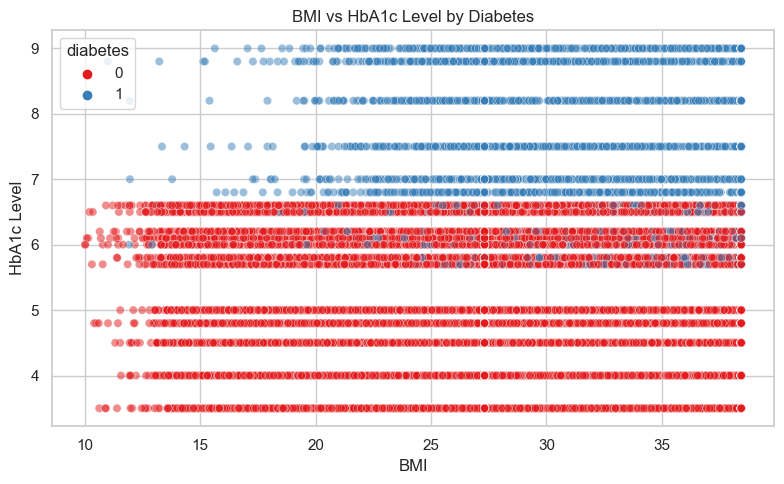

In [13]:
# Visualizing BMI vs HbA1c Level by Diabetes status
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='bmi', y='hbA1c_level', hue='diabetes', alpha=0.5, palette='Set1')
plt.title("BMI vs HbA1c Level by Diabetes")
plt.xlabel("BMI")
plt.ylabel("HbA1c Level")
plt.tight_layout()
plt.show();

Age vs Blood Glucose Level

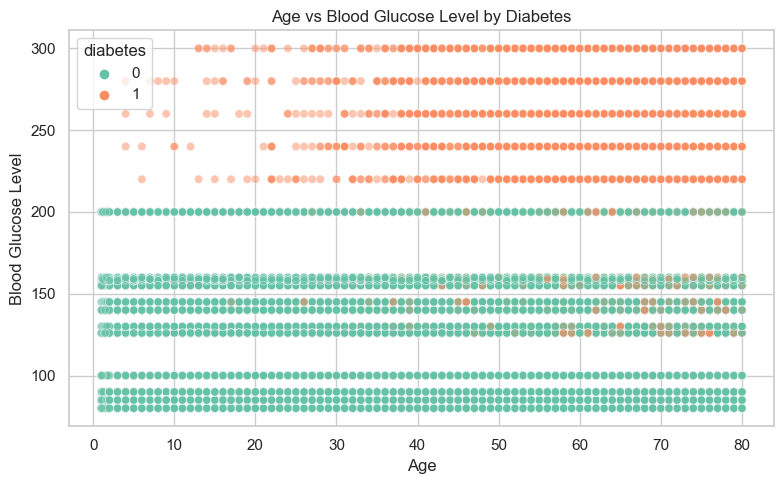

In [14]:
# Age vs Blood Glucose Level by Diabetes
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='blood_glucose_level', hue='diabetes', alpha=0.5, palette='Set2')
plt.title("Age vs Blood Glucose Level by Diabetes")
plt.xlabel("Age")
plt.ylabel("Blood Glucose Level")
plt.tight_layout()
plt.show();

In [15]:
# Clean and standardize categorical text columns
df['gender'] = df['gender'].str.strip().str.title()
df['smoking_history'] = df['smoking_history'].str.strip().str.lower()

Logging Data

In [16]:
# 🔹 Log final shape of dataset
print("📐 Final dataset shape:", df.shape)

# 🔹 Show unique values in cleaned categorical columns
print("\n🧾 Unique values after cleaning:")
print("Gender:", df['gender'].unique())
print("Smoking History:", df['smoking_history'].unique())
print("Location (Top 5):", df['location'].value_counts().head())

# 🔹 Double-check missing values before saving
missing_counts = df.isnull().sum()
if missing_counts.sum() == 0:
    print("\n✅ No missing values remaining in the dataset.")
else:
    print("\n⚠️ Warning: Missing values still present:\n", missing_counts[missing_counts > 0])

# 🔹 Final shape after all cleaning
print("✅ Ready to export cleaned data.")

📐 Final dataset shape: (99075, 16)

🧾 Unique values after cleaning:
Gender: ['Female' 'Male' 'Other']
Smoking History: ['never' 'not current' 'current' 'no info' 'ever' 'former']
Location (Top 5): location
Arkansas     2027
Nebraska     2025
Hawaii       2025
Minnesota    2024
Louisiana    2023
Name: count, dtype: int64

✅ No missing values remaining in the dataset.
✅ Ready to export cleaned data.


In [17]:
# Saving final cleaned dataset in CSV format
df.to_csv(r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\lakshay_cleaned_diabetes.csv", index=False)
print("✅ Final cleaned data saved successfully.")

✅ Final cleaned data saved successfully.


# Phase 2

Loading Cleaned Data and Check Types

In [18]:
# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\lakshay_cleaned_diabetes.csv")

# Quick check
print("✅ Data loaded successfully.")
print("📐 Shape:", df.shape)

# Check column types
print("\n📋 Data Types:")
print(df.dtypes)

# Preview unique values for categorical columns
cat_cols = ['gender', 'smoking_history', 'location']
for col in cat_cols:
    print(f"\n🧾 Unique values in '{col}': {df[col].unique()}")

✅ Data loaded successfully.
📐 Shape: (99075, 16)

📋 Data Types:
year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object

🧾 Unique values in 'gender': ['Female' 'Male' 'Other']

🧾 Unique values in 'smoking_history': ['never' 'not current' 'current' 'no info' 'ever' 'former']

🧾 Unique values in 'location': ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Ma

Encoding Categorical Features

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Define categorical columns
categorical_features = ['gender', 'smoking_history', 'location']

# Define encoder with updated argument
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'  # Keep all other columns as-is
)

# Fit and transform
df_encoded = encoder.fit_transform(df)

# Get new column names
encoded_cols = encoder.named_transformers_['cat'].get_feature_names_out(categorical_features)
other_cols = [col for col in df.columns if col not in categorical_features]

# Combine into a DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=list(encoded_cols) + other_cols)

print("✅ Encoding complete. Shape:", df_encoded.shape)
df_encoded.head()

✅ Encoding complete. Shape: (99075, 74)


,gender_Male,gender_Other,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_no info,smoking_history_not current,location_Alaska,location_Arizona,location_Arkansas,location_California,location_Colorado,location_Connecticut,location_Delaware,location_District of Columbia,location_Florida,location_Georgia,location_Guam,location_Hawaii,location_Idaho,location_Illinois,location_Indiana,location_Iowa,location_Kansas,location_Kentucky,location_Louisiana,location_Maine,location_Maryland,location_Massachusetts,location_Michigan,location_Minnesota,location_Mississippi,location_Missouri,location_Montana,location_Nebraska,location_Nevada,location_New Hampshire,location_New Jersey,location_New Mexico,location_New York,location_North Carolina,location_North Dakota,location_Ohio,location_Oklahoma,location_Oregon,location_Pennsylvania,location_Puerto Rico,location_Rhode Island,location_South Carolina,location_South Dakota,location_Tennessee,location_Texas,location_United States,location_Utah,location_Vermont,location_Virgin Islands,location_Virginia,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,32.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.32,5.0,100.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.95,5.0,90.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.76,4.8,160.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,41.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27.32,4.0,159.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.75,6.5,90.0,0.0


Scaling Numeric Features

In [20]:
from sklearn.preprocessing import StandardScaler

# Define numeric columns to scale
numeric_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

# Separate the features to scale and those to leave unchanged
encoded_cols = [col for col in df_encoded.columns if col not in numeric_cols + ['diabetes']]

# Scale numeric features
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df_encoded[numeric_cols])

# Create scaled DataFrame
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=numeric_cols)

# Combine scaled numerics + encoded + target
df_final = pd.concat([df_scaled_numeric, df_encoded[encoded_cols + ['diabetes']]], axis=1)

print("✅ Scaling complete. Final shape:", df_final.shape)
df_final.head()

✅ Scaling complete. Final shape: (99075, 74)


,age,bmi,hbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_no info,smoking_history_not current,location_Alaska,location_Arizona,location_Arkansas,location_California,location_Colorado,location_Connecticut,location_Delaware,location_District of Columbia,location_Florida,location_Georgia,location_Guam,location_Hawaii,location_Idaho,location_Illinois,location_Indiana,location_Iowa,location_Kansas,location_Kentucky,location_Louisiana,location_Maine,location_Maryland,location_Massachusetts,location_Michigan,location_Minnesota,location_Mississippi,location_Missouri,location_Montana,location_Nebraska,location_Nevada,location_New Hampshire,location_New Jersey,location_New Mexico,location_New York,location_North Carolina,location_North Dakota,location_Ohio,location_Oklahoma,location_Oregon,location_Pennsylvania,location_Puerto Rico,location_Rhode Island,location_South Carolina,location_South Dakota,location_Tennessee,location_Texas,location_United States,location_Utah,location_Vermont,location_Virgin Islands,location_Virginia,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming,year,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,diabetes
0,-0.461073,0.045134,-0.493907,-0.934846,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.595808,-1.264495,-0.493907,-1.180171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.089836,-0.587468,-0.680603,0.537108,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.056868,0.045134,-1.427389,0.512576,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.437160,-0.589245,0.906317,-1.180171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# =========================
# ✅ Save Preprocessing Artifacts
# =========================
base_path = r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data"
os.makedirs(base_path, exist_ok=True)

prep_encoder_path = os.path.join(base_path, "fitted_encoder.pkl")
prep_scaler_path  = os.path.join(base_path, "fitted_scaler.pkl")
joblib.dump(encoder, prep_encoder_path)
joblib.dump(scaler, prep_scaler_path)
print(f"💾 Saved encoder → {prep_encoder_path}")
print(f"💾 Saved scaler  → {prep_scaler_path}")

['C:\\Users\\ABCD\\_ML projects(SDS)\\_CP11-diabetes\\SDS-CP011-predicting-diabetes\\submissions\\community-contributions\\lakshay_yadav\\lakshay_data\\fitted_encoder.pkl']

['C:\\Users\\ABCD\\_ML projects(SDS)\\_CP11-diabetes\\SDS-CP011-predicting-diabetes\\submissions\\community-contributions\\lakshay_yadav\\lakshay_data\\fitted_scaler.pkl']

💾 Saved encoder → C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\fitted_encoder.pkl
💾 Saved scaler  → C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\fitted_scaler.pkl


In [22]:
# Saving final preprocessed dataset in CSV format
df_final.to_csv(r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\lakshay_preprocessed_diabetes.csv", index=False)
print("✅ Final preprocessed data saved successfully.")

✅ Final preprocessed data saved successfully.


# Phase 3

In [23]:
# Splitting Features and Target
from sklearn.model_selection import train_test_split

# Define target and features
X = df_final.drop('diabetes', axis=1)
y = df_final['diabetes']

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split complete")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Target distribution in train:\n", y_train.value_counts(normalize=True))

✅ Data split complete
Training set shape: (79260, 73)
Testing set shape: (19815, 73)
Target distribution in train:
 diabetes
0.0    0.914206
1.0    0.085794
Name: proportion, dtype: float64


Model Training and Testing

✅ Logistic Regression

✅ Logistic Regression Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     18115
         1.0       0.85      0.62      0.72      1700

    accuracy                           0.96     19815
   macro avg       0.91      0.80      0.85     19815
weighted avg       0.96      0.96      0.96     19815



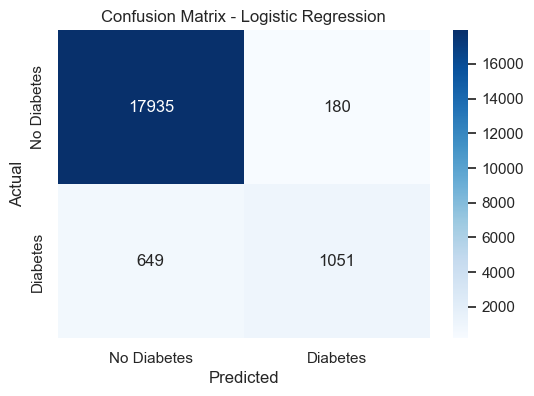

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_reg.predict(X_test)

# Classification report
print("✅ Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

✅ Random Forest Classifier

Random Forest Classifier Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18115
         1.0       0.99      0.67      0.80      1700

    accuracy                           0.97     19815
   macro avg       0.98      0.83      0.89     19815
weighted avg       0.97      0.97      0.97     19815



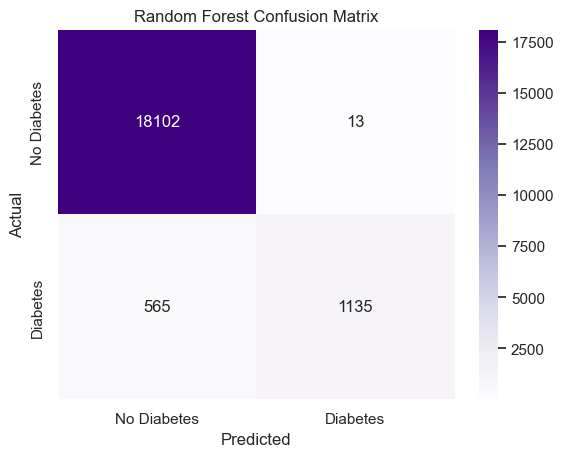

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Classification Report
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

✅ Gradient Boosting Classifier

Gradient Boosting Classifier Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18115
         1.0       0.98      0.68      0.80      1700

    accuracy                           0.97     19815
   macro avg       0.97      0.84      0.89     19815
weighted avg       0.97      0.97      0.97     19815



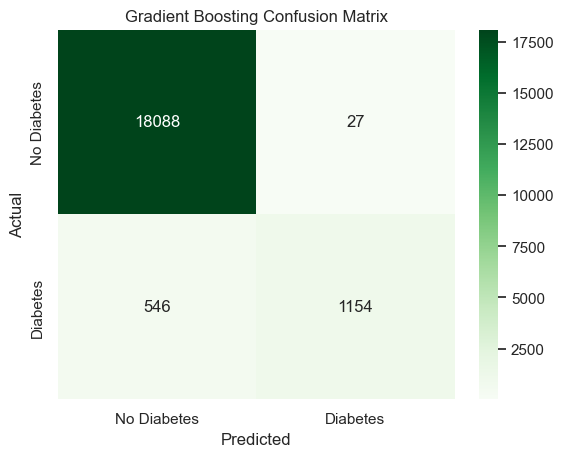

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Classification Report
print("Gradient Boosting Classifier Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix Heatmap
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

✅ XGBoost Classifier

XGBoost Classifier Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18115
         1.0       0.95      0.68      0.80      1700

    accuracy                           0.97     19815
   macro avg       0.96      0.84      0.89     19815
weighted avg       0.97      0.97      0.97     19815



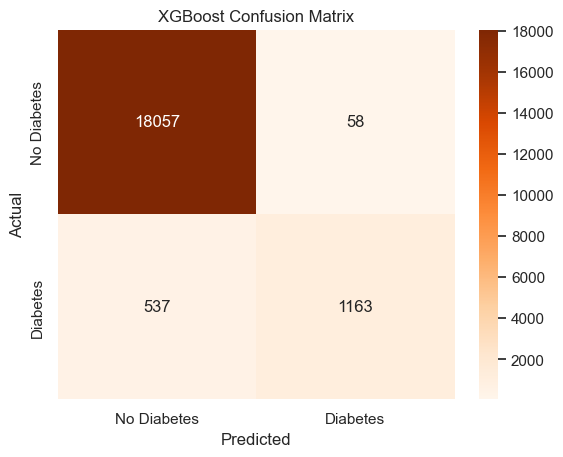

In [27]:
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Classification Report
print("XGBoost Classifier Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix Heatmap
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();


✅ Model Performance Comparison (sorted by ROC-AUC):



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Gradient Boosting,0.971083,0.977138,0.678824,0.801111,0.977149
1,XGBoost,0.969972,0.952498,0.684118,0.796303,0.976348
2,Logistic Regression,0.958163,0.853777,0.618235,0.717161,0.959303
3,Random Forest,0.970830,0.988676,0.667647,0.797051,0.958870



🏆 Best model by ROC-AUC: Gradient Boosting


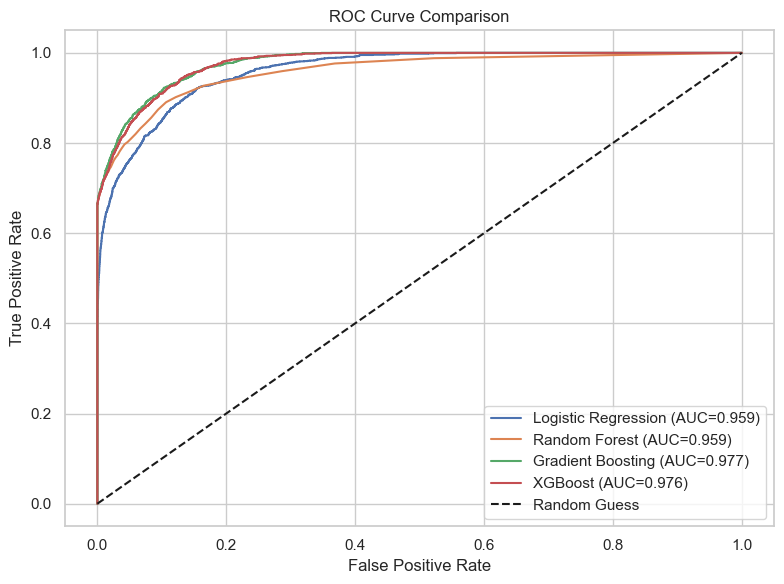

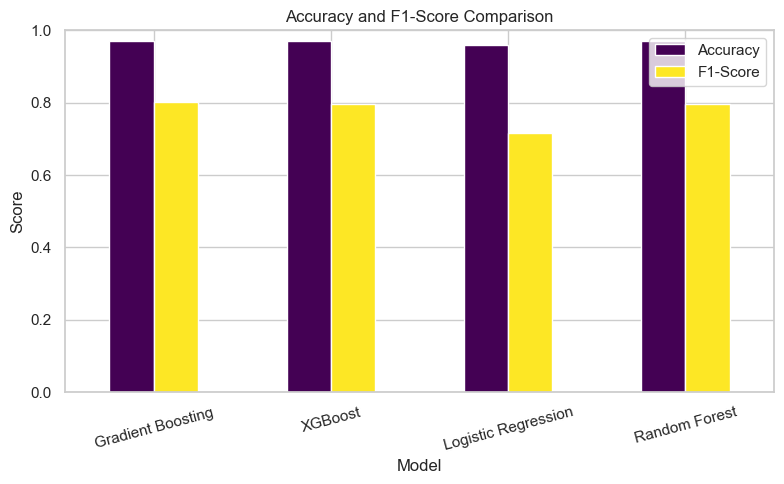

In [29]:
# =========================
# ✅ Model Comparison Block (Cleaned + Best Model Select)
# =========================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

# Gather metrics
models = {
    "Logistic Regression": (log_reg, y_pred_log),
    "Random Forest": (rf_model, y_pred_rf),
    "Gradient Boosting": (gb_model, y_pred_gb),
    "XGBoost": (xgb_model, y_pred_xgb)
}

results = []
for name, (model, y_pred) in models.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # proba for ROC
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    results.append([name, acc, prec, rec, f1, auc])

# Metrics table
results_df = pd.DataFrame(
    results,
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
)

# Sort by ROC-AUC (change to 'F1-Score' if you prefer)
sort_metric = 'ROC-AUC'   # or 'F1-Score'
results_df_sorted = results_df.sort_values(by=sort_metric, ascending=False).reset_index(drop=True)

print("\n✅ Model Performance Comparison (sorted by {}):\n".format(sort_metric))
display(results_df_sorted)

# Identify best model by chosen metric
best_model_name = results_df_sorted.loc[0, 'Model']
best_model_obj = models[best_model_name][0]
print(f"\n🏆 Best model by {sort_metric}: {best_model_name}")

# --------------------------
# Combined ROC Curve
# --------------------------
plt.figure(figsize=(8, 6))
for name, (model, _) in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# --------------------------
# Accuracy & F1 Bar Plot (no noisy return)
# --------------------------
plot_df = results_df_sorted.set_index('Model')[['Accuracy', 'F1-Score']]
ax = plot_df.plot(kind='bar', colormap='viridis', figsize=(8, 5))
ax.set_title('Accuracy and F1-Score Comparison')
ax.set_ylabel('Score')
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.show();

✅ Saving Results

In [30]:
# ---------------------------------
# Paths
# ---------------------------------
base_path = r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data"
os.makedirs(base_path, exist_ok=True)

metrics_path = os.path.join(base_path, "model_metrics.csv")
roc_curve_path = os.path.join(base_path, "roc_curve_comparison.png")
bar_chart_path = os.path.join(base_path, "accuracy_f1_comparison.png")
best_model_path = os.path.join(base_path, f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl")

# ---------------------------------
# 1. Save metrics table
# ---------------------------------
results_df_sorted.to_csv(metrics_path, index=False)
print(f"📁 Metrics saved to: {metrics_path}")

# ---------------------------------
# 2. Save ROC Curve Plot
# ---------------------------------
plt.figure(figsize=(8, 6))
for name, (model, _) in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(roc_curve_path)
plt.close()
print(f"📁 ROC curve saved to: {roc_curve_path}")

# ---------------------------------
# 3. Save Accuracy & F1 Bar Chart
# ---------------------------------
ax = results_df_sorted.set_index('Model')[['Accuracy', 'F1-Score']].plot(
    kind='bar', colormap='viridis', figsize=(8, 5)
)
ax.set_title('Accuracy and F1-Score Comparison')
ax.set_ylabel('Score')
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.savefig(bar_chart_path)
plt.close()
print(f"📁 Accuracy & F1 chart saved to: {bar_chart_path}")

# ---------------------------------
# 4. Save Best Model
# ---------------------------------
joblib.dump(best_model_obj, best_model_path)
print(f"🏆 Best model saved to: {best_model_path}")

📁 Metrics saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\model_metrics.csv


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'ROC Curve Comparison')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

📁 ROC curve saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\roc_curve_comparison.png


Text(0.5, 1.0, 'Accuracy and F1-Score Comparison')

Text(0, 0.5, 'Score')

(0.0, 1.0)

📁 Accuracy & F1 chart saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\accuracy_f1_comparison.png


['C:\\Users\\ABCD\\_ML projects(SDS)\\_CP11-diabetes\\SDS-CP011-predicting-diabetes\\submissions\\community-contributions\\lakshay_yadav\\lakshay_data\\best_model_gradient_boosting.pkl']

🏆 Best model saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\best_model_gradient_boosting.pkl


✅ Hyperparameter Tuning

In [31]:
# =========================
# ✅ Defining Parameter Grids
# =========================
from scipy.stats import randint, uniform

# Random Forest
rf_param_grid = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

# Gradient Boosting
gb_param_grid = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4)
}

# XGBoost
xgb_param_grid = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

In [32]:
# =========================
# ⚡ Fast Hyperparameter Tuning
# =========================
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import clone
from scipy.stats import randint, uniform

# ---- Tuning sample size ----
sample_n = 20000  # reduce if still slow; increase if fast
if X_train.shape[0] > sample_n:
    X_train_tune = X_train.sample(sample_n, random_state=42)
    y_train_tune = y_train.loc[X_train_tune.index]
    print(f"🔎 Using a {sample_n:,}-row subsample for tuning (from {X_train.shape[0]:,}).")
else:
    X_train_tune = X_train
    y_train_tune = y_train
    print("🔎 Using full training set for tuning (data is small enough).")

# ---- Parameter grids (tightened for speed) ----
rf_param_grid = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

gb_param_grid = {
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6),
    'subsample': uniform(0.7, 0.3)
}

xgb_param_grid = {
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# ---- Models + their grids ----
param_grids = {
    'Random Forest': (rf_model, rf_param_grid),
    'Gradient Boosting': (gb_model, gb_param_grid),
    'XGBoost': (xgb_model, xgb_param_grid)
}

tuned_models = {}

for name, (model, grid) in param_grids.items():
    print(f"\n🔍 Tuning {name}...")
    search = RandomizedSearchCV(
        estimator=clone(model),       # don't mutate original
        param_distributions=grid,
        n_iter=10,                    # cut down from 20
        scoring='f1',                 # optimize for F1 (medical risk)
        cv=3,
        random_state=42,
        n_jobs=1,                     # change to -1 if you want full CPU & it's stable
        verbose=1
    )
    search.fit(X_train_tune, y_train_tune)
    tuned_models[name] = search.best_estimator_
    print(f"✅ Best Params for {name}: {search.best_params_}")
    print(f"✅ Best mean CV F1 for {name}: {search.best_score_:.4f}")

🔎 Using a 20,000-row subsample for tuning (from 79,260).

🔍 Tuning Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C7AA6FFD0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C7AA6C130>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C7AA6E0B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C05A4B5B0>},
                   random_state=42, scoring='f1', verbose=1)

✅ Best Params for Random Forest: {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 96}
✅ Best mean CV F1 for Random Forest: 0.8012

🔍 Tuning Gradient Boosting...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021C7AA6E440>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C7AA6E3E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C02625C60>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021C7AA10730>},
                   random_state=42, scoring='f1', verbose=1)

✅ Best Params for Gradient Boosting: {'learning_rate': 0.14017769458977059, 'max_depth': 3, 'n_estimators': 51, 'subsample': 0.9165996316800473}
✅ Best mean CV F1 for Gradient Boosting: 0.8018

🔍 Tuning XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021C7AA10790>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C7AA6FC70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C7AA4BDC0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021C7AA6F5E0>},
                   random_state=42, scoring='f1', verbose=1)

✅ Best Params for XGBoost: {'colsample_bytree': 0.8574269294896713, 'learning_rate': 0.09638900372842316, 'max_depth': 3, 'n_estimators': 140, 'subsample': 0.8835558684167137}
✅ Best mean CV F1 for XGBoost: 0.8068


In [33]:
# =========================
# ✅ Evaluate Tuned Models
# =========================
tuned_results = []

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    tuned_results.append([name, acc, prec, rec, f1, auc])

tuned_df = pd.DataFrame(
    tuned_results,
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
).sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

print("\n✅ Tuned Model Performance:\n")
display(tuned_df)

# Identify tuned best model
tuned_best_model_name = tuned_df.loc[0, 'Model']
tuned_best_model_obj = tuned_models[tuned_best_model_name]
print(f"\n🏆 Best Tuned Model: {tuned_best_model_name}")


✅ Tuned Model Performance:



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,XGBoost,0.971083,0.976331,0.679412,0.801249,0.976952
1,Gradient Boosting,0.970931,0.973064,0.680000,0.800554,0.976133
2,Random Forest,0.970275,0.965633,0.677647,0.796405,0.970450



🏆 Best Tuned Model: XGBoost


In [34]:
# =========================
# ✅ Save Tuned Best Model
# =========================
base_path = r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data"
os.makedirs(base_path, exist_ok=True)

tuned_model_path = os.path.join(base_path, f"best_tuned_model_{tuned_best_model_name.replace(' ', '_').lower()}.pkl")
joblib.dump(tuned_best_model_obj, tuned_model_path)

# Logging
print(f"🏆 Tuned Best Model: {tuned_best_model_name}")
print(f"📁 Model saved at: {tuned_model_path}")

['C:\\Users\\ABCD\\_ML projects(SDS)\\_CP11-diabetes\\SDS-CP011-predicting-diabetes\\submissions\\community-contributions\\lakshay_yadav\\lakshay_data\\best_tuned_model_xgboost.pkl']

🏆 Tuned Best Model: XGBoost
📁 Model saved at: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\best_tuned_model_xgboost.pkl



📊 Baseline vs Tuned Performance:



,Model,Accuracy_Baseline,F1-Score_Baseline,Accuracy_Tuned,F1-Score_Tuned
0,Gradient Boosting,0.971083,0.801111,0.970931,0.800554
1,XGBoost,0.969972,0.796303,0.971083,0.801249
2,Random Forest,0.970830,0.797051,0.970275,0.796405


<Axes: xlabel='Model'>

Text(0.5, 1.0, 'Accuracy: Baseline vs Tuned')

Text(0, 0.5, 'Accuracy')

(0.0, 1.0)

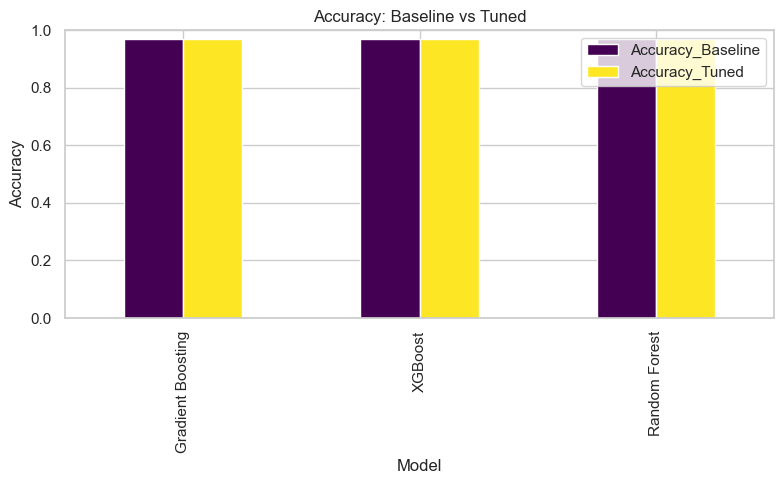

<Axes: xlabel='Model'>

Text(0.5, 1.0, 'F1-Score: Baseline vs Tuned')

Text(0, 0.5, 'F1-Score')

(0.0, 1.0)

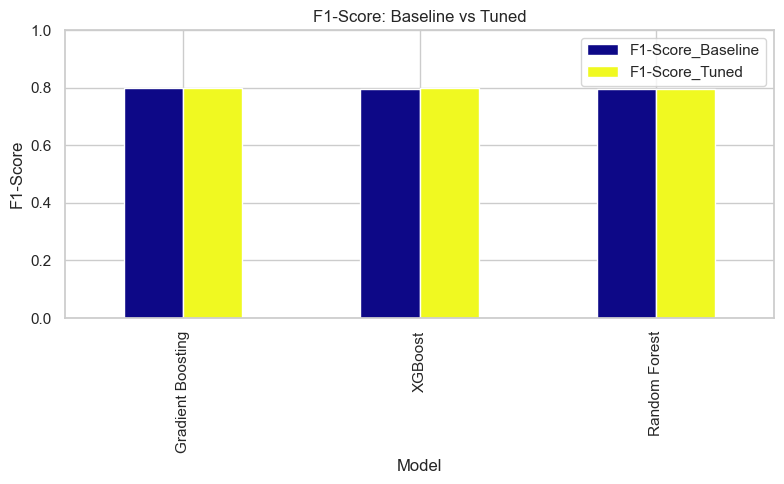

In [35]:
# =========================
# ✅ Baseline vs Tuned Comparison
# =========================
comparison_df = results_df_sorted[['Model', 'Accuracy', 'F1-Score']].merge(
    tuned_df[['Model', 'Accuracy', 'F1-Score']],
    on='Model',
    suffixes=('_Baseline', '_Tuned')
)

print("\n📊 Baseline vs Tuned Performance:\n")
display(comparison_df)

# Plot
comparison_df.set_index('Model')[['Accuracy_Baseline', 'Accuracy_Tuned']].plot(
    kind='bar', figsize=(8, 5), colormap='viridis'
)
plt.title('Accuracy: Baseline vs Tuned')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join(base_path, "accuracy_comparison_baseline_vs_tuned.png"))
plt.show()

comparison_df.set_index('Model')[['F1-Score_Baseline', 'F1-Score_Tuned']].plot(
    kind='bar', figsize=(8, 5), colormap='plasma'
)
plt.title('F1-Score: Baseline vs Tuned')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join(base_path, "f1_comparison_baseline_vs_tuned.png"))
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top 15 Feature Importances - XGBoost')

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

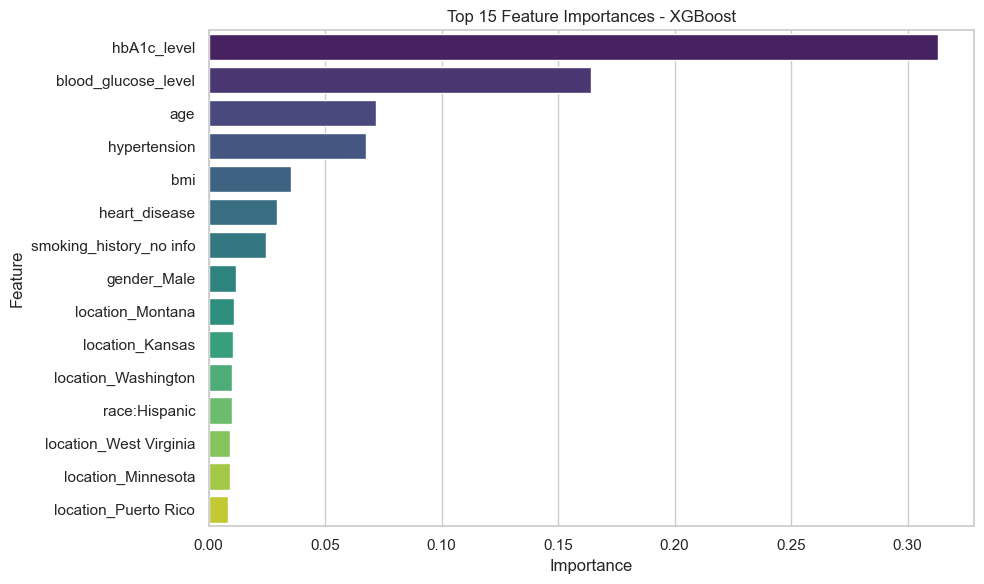

In [36]:
# =========================
# ✅ Feature Importance Plot
# =========================
feature_names = X.columns

if hasattr(tuned_best_model_obj, "feature_importances_"):
    importances = tuned_best_model_obj.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[sorted_idx][:15], y=np.array(feature_names)[sorted_idx][:15], palette='viridis')
    plt.title(f"Top 15 Feature Importances - {tuned_best_model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(os.path.join(base_path, "feature_importance_best_tuned.png"))
    plt.show()
else:
    print(f"⚠️ Feature importances not available for {tuned_best_model_name}.")

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'ROC Curve - Tuned Models')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

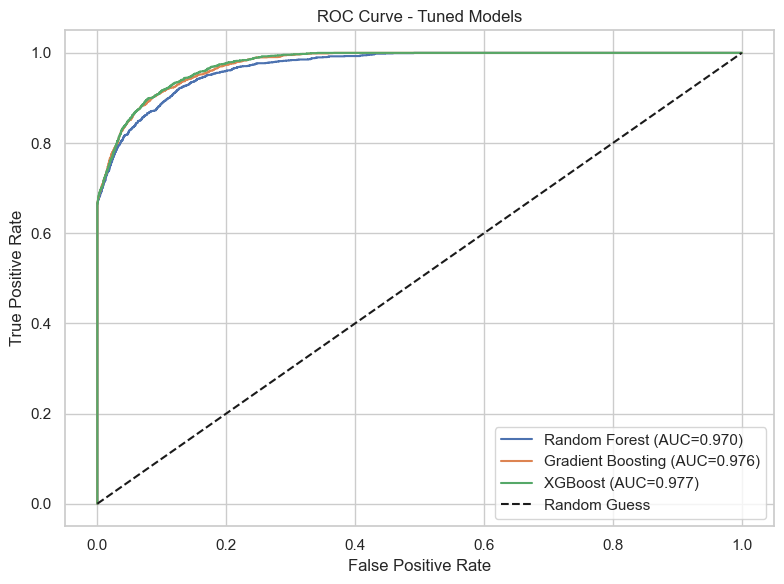

📁 ROC curve saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\roc_curve_tuned_models.png


In [37]:
# =========================
# ✅ ROC Curve for Tuned Models
# =========================
plt.figure(figsize=(8, 6))
for name, model in tuned_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve - Tuned Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
roc_tuned_path = os.path.join(base_path, "roc_curve_tuned_models.png")
plt.savefig(roc_tuned_path)
plt.show()
print(f"📁 ROC curve saved to: {roc_tuned_path}")

In [38]:
# =========================
# ✅ Performance Delta Table
# =========================
delta_df = comparison_df.copy()
delta_df['Accuracy_Improvement'] = (delta_df['Accuracy_Tuned'] - delta_df['Accuracy_Baseline']).round(4)
delta_df['F1_Improvement'] = (delta_df['F1-Score_Tuned'] - delta_df['F1-Score_Baseline']).round(4)

print("\n📈 Performance Improvement After Tuning:\n")
display(delta_df)

# Save delta table
base_path = r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data"
delta_table_path = os.path.join(base_path, "performance_delta_baseline_vs_tuned.csv")
delta_df.to_csv(delta_table_path, index=False)
print(f"📁 Delta table saved to: {delta_table_path}")


📈 Performance Improvement After Tuning:



,Model,Accuracy_Baseline,F1-Score_Baseline,Accuracy_Tuned,F1-Score_Tuned,Accuracy_Improvement,F1_Improvement
0,Gradient Boosting,0.971083,0.801111,0.970931,0.800554,-0.0002,-0.0006
1,XGBoost,0.969972,0.796303,0.971083,0.801249,0.0011,0.0049
2,Random Forest,0.970830,0.797051,0.970275,0.796405,-0.0006,-0.0006


📁 Delta table saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\performance_delta_baseline_vs_tuned.csv


In [39]:
# =========================
# ✅ Save Tuned Metrics & Feature Metadata
# =========================

# Update base path
base_path = r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data"

# 1. Save tuned metrics table
tuned_metrics_path = os.path.join(base_path, "tuned_model_metrics.csv")
tuned_df.to_csv(tuned_metrics_path, index=False)
print(f"📁 Tuned metrics saved to: {tuned_metrics_path}")

# 2. Save feature metadata (order + types)
feature_metadata = {
    "feature_order": list(X.columns),
    "categorical_features": categorical_features,
    "numeric_features": numeric_cols,
    "target": "diabetes"
}

metadata_path = os.path.join(base_path, "feature_metadata.json")
import json
with open(metadata_path, "w") as f:
    json.dump(feature_metadata, f, indent=4)

print(f"📁 Feature metadata saved to: {metadata_path}")

📁 Tuned metrics saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\tuned_model_metrics.csv
📁 Feature metadata saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\feature_metadata.json


Retraining Best Tuned Model on Full Data

In [40]:
# =========================
# ✅ Retrain Best Tuned Model on Full Dataset
# =========================

# Combine training and test data
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

# Clone and retrain the tuned best model
from sklearn.base import clone
final_model = clone(tuned_best_model_obj)
final_model.fit(X_full, y_full)

print(f"🏆 Final production model retrained on full dataset using {tuned_best_model_name}.")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8574269294896713, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09638900372842316,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

🏆 Final production model retrained on full dataset using XGBoost.


In [41]:
# =========================
# 💾 Save Final Production Model
# =========================

final_model_path = os.path.join(base_path, "final_production_model.pkl")
joblib.dump(final_model, final_model_path)

print(f"📁 Final production model saved to: {final_model_path}")

['C:\\Users\\ABCD\\_ML projects(SDS)\\_CP11-diabetes\\SDS-CP011-predicting-diabetes\\submissions\\community-contributions\\lakshay_yadav\\lakshay_data\\final_production_model.pkl']

📁 Final production model saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\final_production_model.pkl


In [42]:
# =========================
# ✅ Save Feature Metadata
# =========================

feature_metadata = {
    "feature_names": list(X.columns),
    "categorical_features": categorical_features,
    "numeric_features": numeric_cols
}

feature_metadata_path = os.path.join(base_path, "feature_metadata.pkl")
joblib.dump(feature_metadata, feature_metadata_path)

print(f"📁 Feature metadata saved to: {feature_metadata_path}")

['C:\\Users\\ABCD\\_ML projects(SDS)\\_CP11-diabetes\\SDS-CP011-predicting-diabetes\\submissions\\community-contributions\\lakshay_yadav\\lakshay_data\\feature_metadata.pkl']

📁 Feature metadata saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\feature_metadata.pkl


In [43]:
# =========================
# 📊 Save Tuned Model Metrics
# =========================

tuned_metrics_path = os.path.join(base_path, "tuned_model_metrics.csv")
tuned_df.to_csv(tuned_metrics_path, index=False)

print(f"📁 Tuned model metrics saved to: {tuned_metrics_path}")

📁 Tuned model metrics saved to: C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data\tuned_model_metrics.csv


# 🎯 Phase 3 Completion Summary

**Artifacts Saved:**
- **Preprocessed dataset:** `lakshay_preprocessed_diabetes.csv`
- **Encoder:** `fitted_encoder.pkl`
- **Scaler:** `fitted_scaler.pkl`
- **Baseline model metrics:** `model_metrics.csv`
- **Best baseline model:** `best_model_<model_name>.pkl`
- **Tuned model metrics:** `tuned_model_metrics.csv`
- **Best tuned model:** `best_tuned_model_<model_name>.pkl`
- **Baseline vs tuned comparison plots:** Saved in `lakshay_data` folder
- **Feature metadata:** `feature_metadata.pkl`
- **Performance delta table:** `performance_delta_baseline_vs_tuned.csv`

---

### **Next Step**
Proceed to **Phase 4: Streamlit Deployment**, where we will:
1. Load all saved artifacts.
2. Build a preprocessing + prediction pipeline.
3. Create a user-friendly UI for diabetes prediction.

# Phase 4: Streamlit Deployment

In [44]:
# =========================
# 🔄 Load Artifacts for Deployment
# =========================

# Base path
base_path = r"C:\Users\ABCD\_ML projects(SDS)\_CP11-diabetes\SDS-CP011-predicting-diabetes\submissions\community-contributions\lakshay_yadav\lakshay_data"

# Load artifacts
encoder = joblib.load(os.path.join(base_path, "fitted_encoder.pkl"))
scaler = joblib.load(os.path.join(base_path, "fitted_scaler.pkl"))
feature_metadata = joblib.load(os.path.join(base_path, "feature_metadata.pkl"))

# Load best tuned model
best_tuned_model_path = [f for f in os.listdir(base_path) if f.startswith("best_tuned_model")][0]
best_tuned_model = joblib.load(os.path.join(base_path, best_tuned_model_path))

print("✅ Artifacts loaded successfully!")
print(f"Loaded best tuned model → {best_tuned_model_path}")

# Check feature metadata
print("\nFeature Metadata:", feature_metadata)

✅ Artifacts loaded successfully!
Loaded best tuned model → best_tuned_model_xgboost.pkl

Feature Metadata: {'feature_names': ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'gender_Male', 'gender_Other', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_no info', 'smoking_history_not current', 'location_Alaska', 'location_Arizona', 'location_Arkansas', 'location_California', 'location_Colorado', 'location_Connecticut', 'location_Delaware', 'location_District of Columbia', 'location_Florida', 'location_Georgia', 'location_Guam', 'location_Hawaii', 'location_Idaho', 'location_Illinois', 'location_Indiana', 'location_Iowa', 'location_Kansas', 'location_Kentucky', 'location_Louisiana', 'location_Maine', 'location_Maryland', 'location_Massachusetts', 'location_Michigan', 'location_Minnesota', 'location_Mississippi', 'location_Missouri', 'location_Montana', 'location_Nebraska', 'location_Nevada', 'location_New Hampshire', 'location_New Jersey', 

In [45]:
# =========================
# 🔍 Sample Inference Test
# =========================

# Step 1: Mock raw user input
sample_input = {
    'age': 45,
    'bmi': 28.5,
    'hbA1c_level': 6.4,
    'blood_glucose_level': 155,
    'gender': 'Male',
    'smoking_history': 'never',
    'location': 'California',
    'hypertension': 0,
    'heart_disease': 0,
    'year': 2020,
    'race:Hispanic': 0,  # Assuming one-hot encoded columns were part of original df
    'race:Asian': 0,
    'race:AfricanAmerican': 0,
    'race:Caucasian': 1,
    'race:Other': 0
}

# Step 2: Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# Step 3: Ensure columns match the original training set
# Reorder and add any missing columns with default value
for col in feature_metadata['feature_names']:
    if col not in sample_df.columns:
        sample_df[col] = 0  # or use NaN/default

# Reorder to match training feature order
sample_df = sample_df[feature_metadata['feature_names']]

# Step 4: Scale numeric columns
scaled_numeric = scaler.transform(sample_df[feature_metadata['numeric_features']])

# Step 5: Combine scaled numeric and remaining features
encoded_array = sample_df.drop(columns=feature_metadata['numeric_features']).values
sample_processed = np.hstack([scaled_numeric, encoded_array])

# Step 6: Create final input for model
final_input_df = pd.DataFrame(sample_processed, columns=feature_metadata['feature_names'])

# Step 7: Predict
prediction = best_tuned_model.predict(final_input_df)[0]
probability = best_tuned_model.predict_proba(final_input_df)[0][1]

# Step 8: Output
print(f"🔮 Predicted Class: {'Diabetes' if prediction == 1 else 'No Diabetes'}")
print(f"📊 Probability of Diabetes: {probability:.4f}")

🔮 Predicted Class: No Diabetes
📊 Probability of Diabetes: 0.0403
